In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [144]:
# Read in data
df = pd.read_csv(r'C:/Users/DELL/Desktop/DATA SCIENCE/Assignment/ML PROJECT/Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [146]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [148]:
df.isnull().values.any()

False

In [150]:
#EDA
df['Score'].value_counts()

Score
5    339
4     70
3     37
1     36
2     18
Name: count, dtype: int64

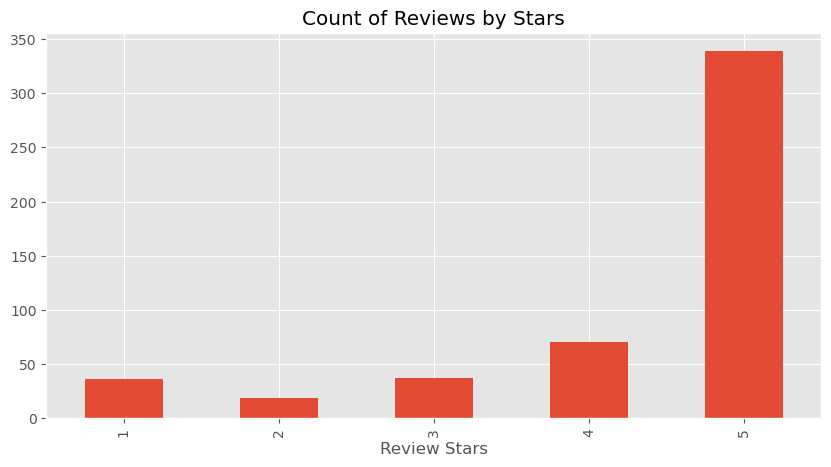

In [152]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars',figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [154]:
#Basic NLTK
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [156]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [158]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [102]:
#VADER Seniment Scoring

In [160]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [104]:
'''neg (Negative - नकारात्मक): यह स्कोर टेक्स्ट के उस हिस्से का प्रतिशत (probability) दर्शाता है जो नकारात्मक है। इसका मान 0 से 1 के बीच होता है।
उदाहरण: "खाना बहुत बुरा था" में neg स्कोर अधिक होगा।
neu (Neutral - तटस्थ): यह स्कोर टेक्स्ट के उस हिस्से का प्रतिशत दर्शाता है जो तटस्थ (न सकारात्मक, न नकारात्मक) है। इसका मान भी 0 से 1 के बीच होता है।
उदाहरण: "आज मौसम सामान्य है" में neu स्कोर अधिक होगा।
pos (Positive - सकारात्मक): यह स्कोर टेक्स्ट के उस हिस्से का प्रतिशत दर्शाता है जो सकारात्मक है। इसका मान भी 0 से 1 के बीच होता है।
उदाहरण: "फिल्म शानदार थी" में pos स्कोर अधिक होगा।
compound (Overall/Composite - समग्र स्कोर): यह मुख्य और सबसे उपयोगी मीट्रिक है। यह एक एकल, सामान्यीकृत (normalized) स्कोर है जो पूरे टेक्स्ट की समग्र भावना (positive, negative, and neutral scores को मिलाकर) को बताता है।
इसका मान -1 (सबसे नकारात्मक) से +1 (सबसे सकारात्मक) के बीच होता है।
आमतौर पर, इसकी व्याख्या इस प्रकार की जाती है:
compound स्कोर >= 0.05 होने पर sentiment सकारात्मक माना जाता है।
compound स्कोर <= -0.05 होने पर sentiment नकारात्मक माना जाता है।
compound स्कोर -0.05 और 0.05 के बीच होने पर sentiment तटस्थ माना जाता है। '''

'neg (Negative - नकारात्मक): यह स्कोर टेक्स्ट के उस हिस्से का प्रतिशत (probability) दर्शाता है जो नकारात्मक है। इसका मान 0 से 1 के बीच होता है।\nउदाहरण: "खाना बहुत बुरा था" में neg स्कोर अधिक होगा।\nneu (Neutral - तटस्थ): यह स्कोर टेक्स्ट के उस हिस्से का प्रतिशत दर्शाता है जो तटस्थ (न सकारात्मक, न नकारात्मक) है। इसका मान भी 0 से 1 के बीच होता है।\nउदाहरण: "आज मौसम सामान्य है" में neu स्कोर अधिक होगा।\npos (Positive - सकारात्मक): यह स्कोर टेक्स्ट के उस हिस्से का प्रतिशत दर्शाता है जो सकारात्मक है। इसका मान भी 0 से 1 के बीच होता है।\nउदाहरण: "फिल्म शानदार थी" में pos स्कोर अधिक होगा।\ncompound (Overall/Composite - समग्र स्कोर): यह मुख्य और सबसे उपयोगी मीट्रिक है। यह एक एकल, सामान्यीकृत (normalized) स्कोर है जो पूरे टेक्स्ट की समग्र भावना (positive, negative, and neutral scores को मिलाकर) को बताता है।\nइसका मान -1 (सबसे नकारात्मक) से +1 (सबसे सकारात्मक) के बीच होता है।\nआमतौर पर, इसकी व्याख्या इस प्रकार की जाती है:\ncompound स्कोर >= 0.05 होने पर sentiment सकारात्मक माना जाता है।\ncompoun

In [162]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [164]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [166]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [168]:
!pip install jupyterlab-widgets

In [109]:
'''1. vaders = pd.DataFrame(res).T 
pd.DataFrame(res): यह res नाम के डेटा (जो अक्सर डिक्शनरी या लिस्ट होती है) को एक DataFrame (टेबल) में बदलता है।
.T (Transpose): यह टेबल की पंक्तियों (Rows) को कॉलम (Columns) में और कॉलम को पंक्तियों में बदल देता है। यह अक्सर तब किया जाता है जब विश्लेषण के परिणाम 
(जैसे VADER sentiment scores) क्षैतिज (Horizontal) के बजाय लंबवत (Vertical) चाहिए हों। 
2. vaders = vaders.reset_index().rename(columns={'index': 'Id'})
reset_index(): पुरानी इंडेक्स को हटाकर एक नया संख्यात्मक इंडेक्स (0, 1, 2...) बनाता है। पुरानी इंडेक्स अब एक साधारण कॉलम बन जाती है।
rename(columns={'index': 'Id'}): जो कॉलम 'index' नाम से बना था, उसका नाम बदलकर 'Id' रख दिया जाता है ताकि इसे मुख्य डेटासेट की ID से जोड़ा जा सके। 
3. vaders = vaders.merge(df, how='left')
merge(): यह vaders टेबल को df (मुख्य डेटासेट) के साथ जोड़ता है।
how='left': यह सुनिश्चित करता है कि vaders टेबल का सारा डेटा सुरक्षित रहे, और df से केवल वही जानकारी ली जाए जो vaders की 'Id' से मेल खाती हो।
आसान शब्दों में सारांश:
यह कोड सेंटीमेंट एनालिसिस (VADER) के नतीजों को लेकर उन्हें एक साफ-सुथरी टेबल में बदलता है, उनकी 'Id' को सही नाम देता है, 
और फिर उन्हें आपके मूल डेटासेट (df) के साथ जोड़ देता है ताकि आप देख सकें कि किस टेक्स्ट का क्या स्कोर आया है।'''


"1. vaders = pd.DataFrame(res).T \npd.DataFrame(res): यह res नाम के डेटा (जो अक्सर डिक्शनरी या लिस्ट होती है) को एक DataFrame (टेबल) में बदलता है।\n.T (Transpose): यह टेबल की पंक्तियों (Rows) को कॉलम (Columns) में और कॉलम को पंक्तियों में बदल देता है। यह अक्सर तब किया जाता है जब विश्लेषण के परिणाम \n(जैसे VADER sentiment scores) क्षैतिज (Horizontal) के बजाय लंबवत (Vertical) चाहिए हों। \n2. vaders = vaders.reset_index().rename(columns={'index': 'Id'})\nreset_index(): पुरानी इंडेक्स को हटाकर एक नया संख्यात्मक इंडेक्स (0, 1, 2...) बनाता है। पुरानी इंडेक्स अब एक साधारण कॉलम बन जाती है।\nrename(columns={'index': 'Id'}): जो कॉलम 'index' नाम से बना था, उसका नाम बदलकर 'Id' रख दिया जाता है ताकि इसे मुख्य डेटासेट की ID से जोड़ा जा सके। \n3. vaders = vaders.merge(df, how='left')\nmerge(): यह vaders टेबल को df (मुख्य डेटासेट) के साथ जोड़ता है।\nhow='left': यह सुनिश्चित करता है कि vaders टेबल का सारा डेटा सुरक्षित रहे, और df से केवल वही जानकारी ली जाए जो vaders की 'Id' से मेल खाती हो।\nआसान शब्दों मे

In [170]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [172]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [174]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


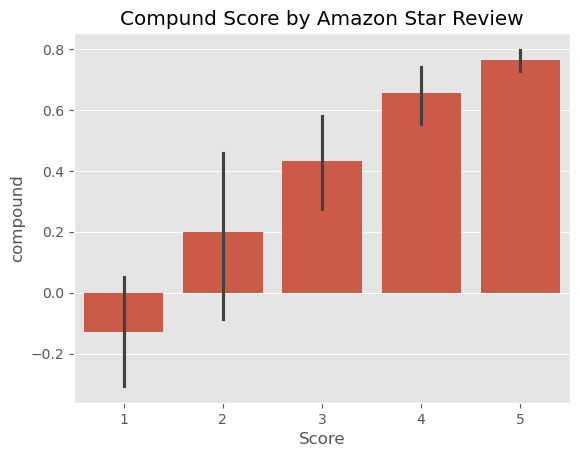

In [176]:
#Plot VADER results
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

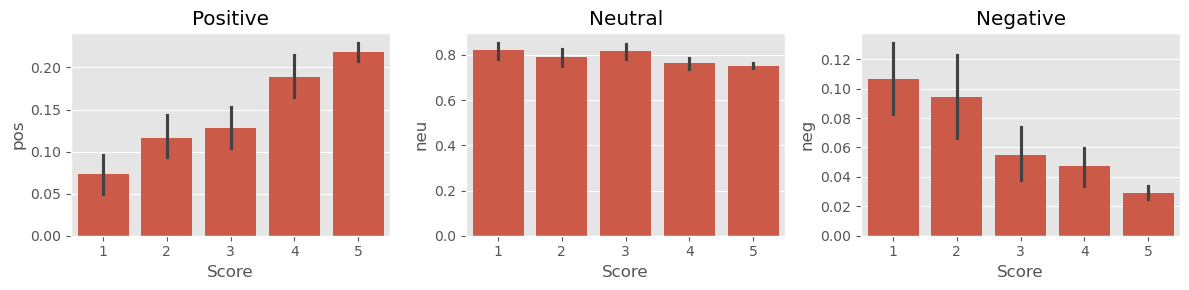

In [178]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [115]:
!pip install transformers

In [180]:
#Roberta Pretrained Model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [182]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [184]:
sentences = vaders['Summary'].tolist()
len(sentences)

500

In [186]:

sentences_as_one_string =" ".join(sentences)

sentences_as_one_string

'Good Quality Dog Food Not as Advertised "Delight" says it all Cough Medicine Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Yay Barley Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Strawberry Twizzlers - Yummy Lots of twizzlers, just what you expect. poor taste Love it! GREAT SWEET CANDY! Home delivered twizlers Always fresh TWIZZLERS Delicious product! Twizzlers Please sell these in Mexico!! Twizzlers - Strawberry Nasty No flavor Great Bargain for the Price YUMMY! The Best Hot Sauce in the World Great machine! THIS IS MY TASTE... Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! it\'s oatmeal GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Oatmeal For Oatmeal Lovers Food-Great Good Hot 

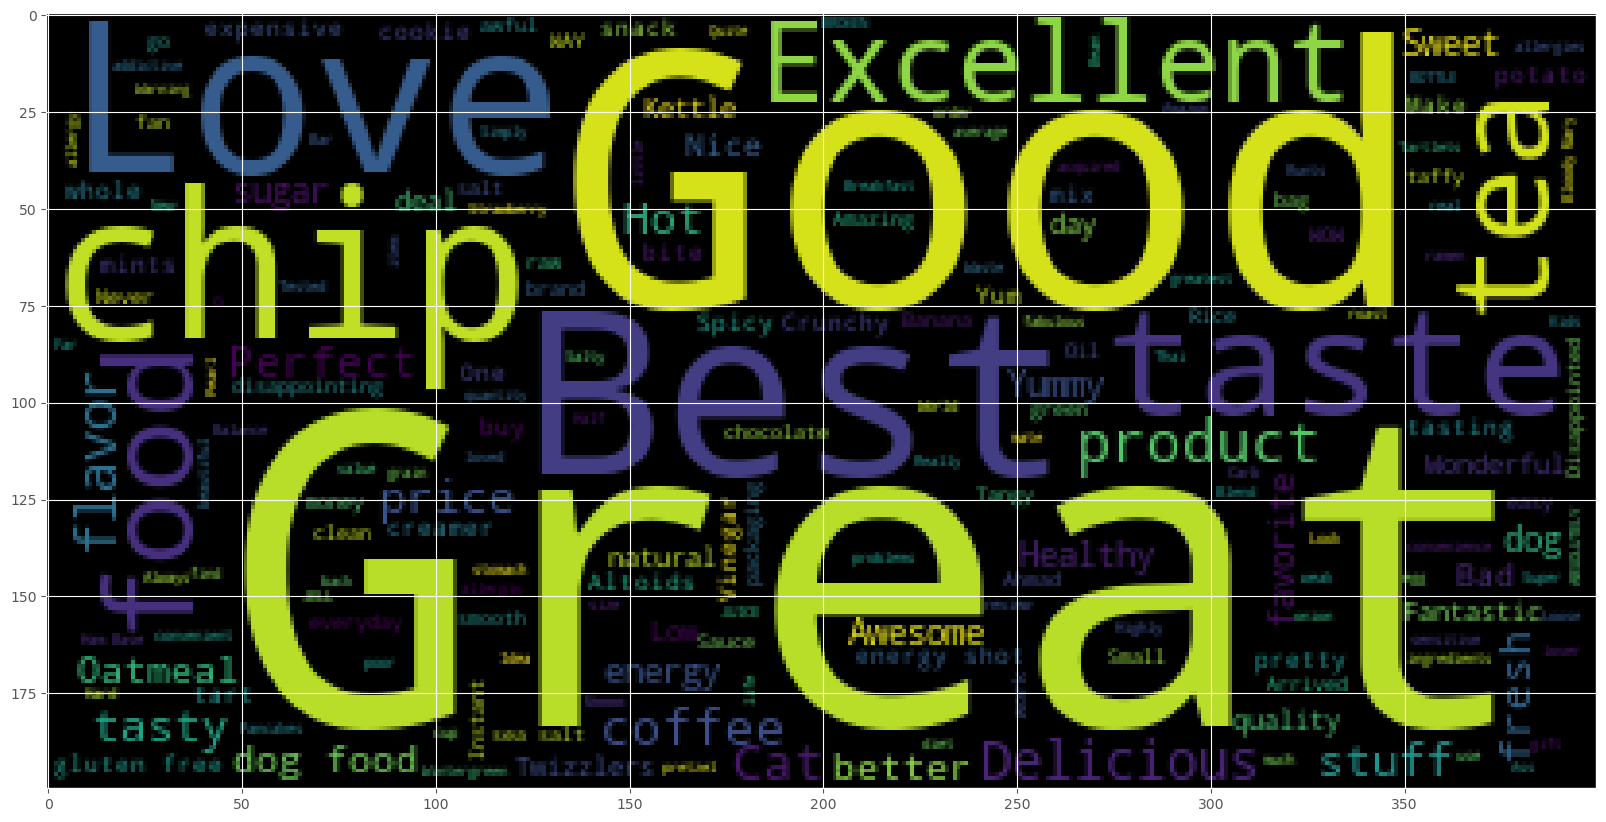

In [188]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [134]:
positive = vaders[vaders['Score'].isin([4, 5])]
positive

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,0.029,0.809,0.163,0.8830,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,0.034,0.693,0.273,0.9346,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [136]:
negative = vaders[vaders['Score'].isin([1, 2])]
negative

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
12,13,0.031,0.923,0.046,0.2960,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...
16,17,0.097,0.694,0.209,0.7481,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...
26,27,0.128,0.872,0.000,-0.2960,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan..."
50,51,0.220,0.780,0.000,-0.5448,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d..."
62,63,0.000,1.000,0.000,0.0000,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...
67,68,0.183,0.776,0.041,-0.9116,B005DUM9UQ,A8OFFIAL6XTOH,Bill Shirer,0,1,2,1338422400,Taste is not so good.,"I purchased the Mango flavor, and to me it doe..."
73,74,0.093,0.762,0.144,0.9665,B0059WXJKM,A25VFHVGI4CFTP,Diana Robinson,0,1,1,1335744000,Warning! WARNING! -ALCOHOL SUGARS!,Buyer Beware Please! This sweetener is not for...
74,75,0.000,0.872,0.128,0.2263,B001EPPI84,A3Q0IDQ03S0158,Jen,0,0,2,1287705600,nothing special,It is okay. I would not go out of my way to b...


In [190]:
negative_list = negative['Summary'].tolist()
negative_list

['Not as Advertised',
 'Cough Medicine',
 'My Cats Are Not Fans of the New Food',
 'poor taste',
 'Nasty No flavor',
 "Don't like it",
 'stale product.',
 'Taste is not so good.',
 'Warning!  WARNING!  -ALCOHOL SUGARS!',
 'nothing special',
 'No Tea Flavor',
 'Bad',
 'Low Carb Angel Food Puffs',
 'Not for me',
 'BROKEN BOTTLE BOTTOMS!',
 'Rip off Price',
 'Tasteless but low calorie',
 'Very Low quality',
 'Not Banana Runts',
 'Altoids Smalls',
 "These just don't do it for me as breath mints",
 'Nearly killed the cats',
 'CHANGED FORMULA MAKES CATS SICK!!!!',
 'Price cannot be correct',
 'Not a real tea',
 'Not Good',
 'Furniture Polish Taste',
 'Taste is neutral, quantity is DECEITFUL!',
 'Disappointed',
 'Sad outcome',
 "Don't Waste Your Money",
 "If you can't handle caffeine, this is not for you.",
 'Reeks like chemicals',
 'Disappointed!',
 'Lie!!!!',
 'Over priced chips and lack rice taste',
 'So awful I can barely describe',
 'Very Dissapointed',
 'what quantity is it!',
 'Never A

In [192]:
negative_sentences_as_one_string = " ".join(negative_list)

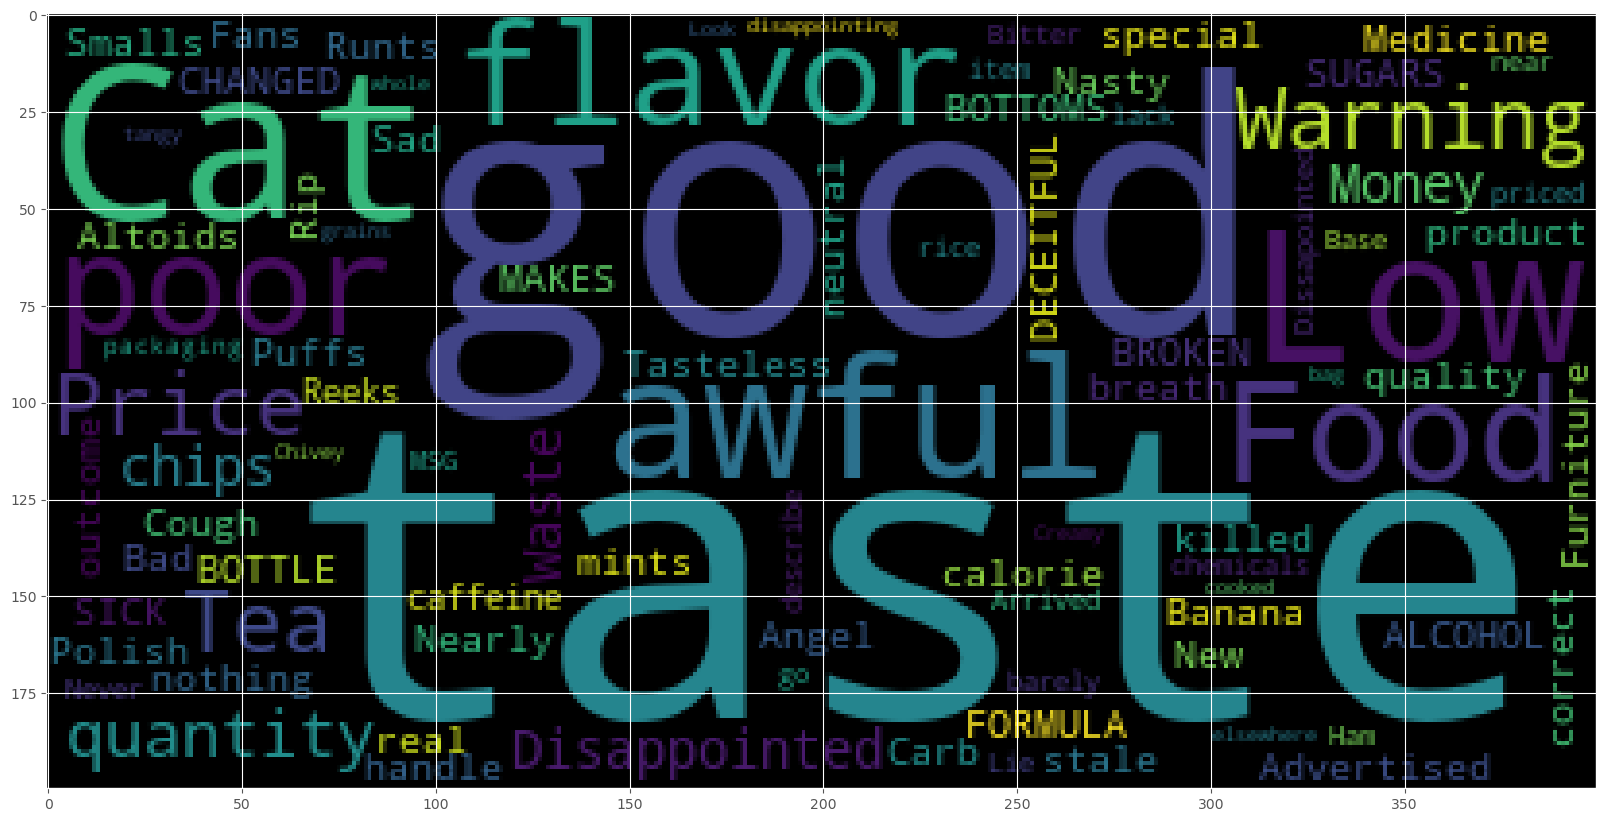

In [194]:
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))